In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
file_path = '../input/car-vs-bike-classification-dataset/Car-Bike-Dataset/'

In [7]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [8]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(file_path, output="./new",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 4000 files [00:16, 239.13 files/s]


In [9]:
TRAIN_DIR = './new/train'
TEST_DIR = './new/test'
VAL_DIR = './new/val'

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


test_datagen  = ImageDataGenerator(rescale=1.0/255.0)
val_gen   = ImageDataGenerator(rescale=1.0/255.0)


test_set = test_datagen.flow_from_directory(TEST_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Load and iterate validation dataset
val_ds = val_gen.flow_from_directory(VAL_DIR,target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [11]:
cnn = tf.keras.models.Sequential()

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-22 00:43:43.532455: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 13.7 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


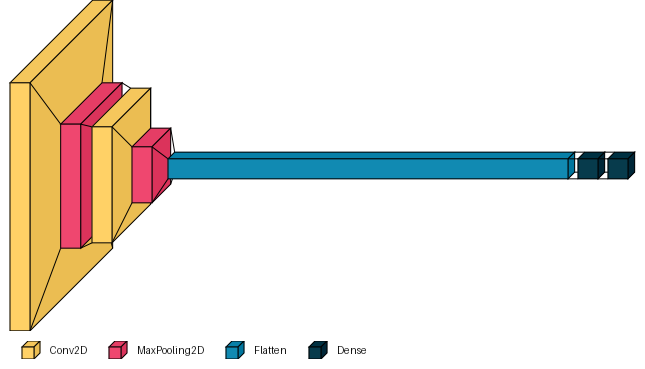

In [20]:
import visualkeras
visualkeras.layered_view(cnn, legend=True)

In [21]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - accuracy: 0.6858 - loss: 0.5822 - val_accuracy: 0.8550 - val_loss: 0.3612
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.8854 - loss: 0.2819 - val_accuracy: 0.9100 - val_loss: 0.1944
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.8729 - loss: 0.2864 - val_accuracy: 0.9225 - val_loss: 0.1780
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.8832 - loss: 0.2736 - val_accuracy: 0.8950 - val_loss: 0.2907
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9212 - loss: 0.2279 - val_accuracy: 0.9400 - val_loss: 0.1663


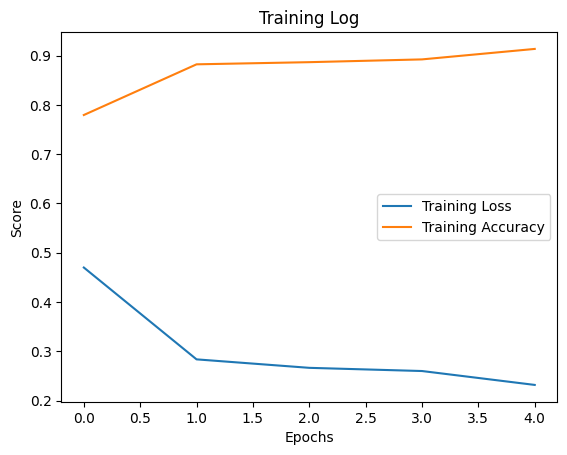

In [23]:
plt.title('Training Log')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()

In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/kaggle/working/new/test/Car/Car (1777).jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'car'
else:
  prediction = 'bike'


print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[1.]]
car
